# Welcome to Jupyter!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
deliveries_df = pd.read_csv('deliveries.csv')
matches_df =  pd.read_csv('matches.csv')

In [3]:
deliveries_df.shape,matches_df.shape

((179078, 21), (756, 18))

In [4]:
deliveries_df.info(),matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

(None, None)

***Top 10 run scorers in IPL***

In [5]:
data1 = deliveries_df[['batsman','batsman_runs']]
data1= data1.groupby('batsman').sum()
data1 = data1.sort_values('batsman_runs',ascending=False)[:10].reset_index()
data1

,batsman,batsman_runs
0,V Kohli,5431
1,SK Raina,5404
2,RG Sharma,4912
3,DA Warner,4726
4,S Dhawan,4613
5,CH Gayle,4534
6,MS Dhoni,4456
7,RV Uthappa,4435
8,AB de Villiers,4423
9,G Gambhir,4223


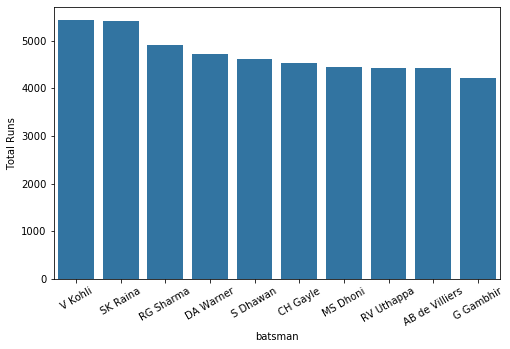

In [6]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=data1,x='batsman',y='batsman_runs',color=color);
plt.xticks(rotation=30);
plt.ylabel('Total Runs');

**Top 10 batsman with highest average**

In [7]:
runs = deliveries_df[['batsman','batsman_runs']].groupby('batsman').sum()
dismissals = deliveries_df.player_dismissed.value_counts().to_frame().reset_index()
dismissals.rename(columns={'index':'batsman'},inplace=True)
avg_data = pd.merge(runs,dismissals,on='batsman')
avg_data['average'] = avg_data['batsman_runs']/avg_data['player_dismissed']
avg_data= avg_data.sort_values(by='average',ascending=False)
avg_10 = avg_data[:10]
avg_10

,batsman,batsman_runs,player_dismissed,average
166,J Bairstow,460,8,57.500000
268,MN van Wyk,167,3,55.666667
27,AC Voges,181,4,45.250000
151,HM Amla,577,13,44.384615
162,Iqbal Abdulla,88,2,44.000000
104,DA Warner,4726,110,42.963636
208,KL Rahul,2004,47,42.638298
272,MS Dhoni,4456,105,42.438095
85,CH Gayle,4534,109,41.596330
310,PD Collingwood,203,5,40.600000


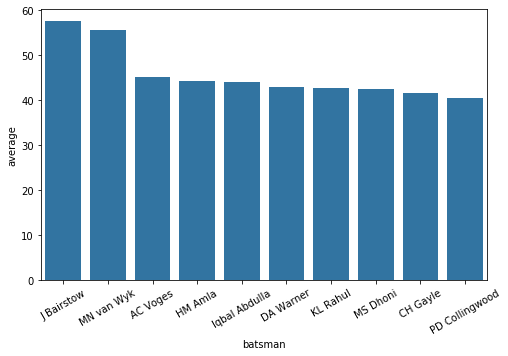

In [8]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=avg_10,x='batsman',y='average',color=color);
plt.xticks(rotation=30);


**Max no. of fifties**

In [9]:
fifties = deliveries_df[['match_id','batsman','batsman_runs']]
fifties = fifties.groupby(['match_id','batsman']).sum()
fifties = fifties[(fifties.batsman_runs > 49) & (fifties.batsman_runs < 100)]
fifties = fifties.groupby('batsman').count().sort_values('batsman_runs',ascending=False).reset_index()
fifties = fifties[:10]

In [10]:
fifties

,batsman,batsman_runs
0,DA Warner,44
1,V Kohli,38
2,SK Raina,38
3,S Dhawan,37
4,RG Sharma,36
5,G Gambhir,36
6,AB de Villiers,34
7,CH Gayle,28
8,AM Rahane,27
9,RV Uthappa,24


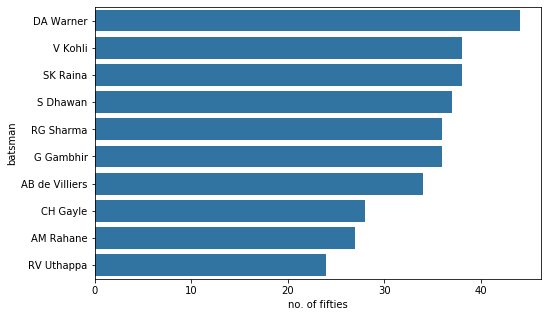

In [11]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=fifties,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('no. of fifties');

**Max no of hundreds**

In [12]:
hundreds = deliveries_df[['match_id','batsman','batsman_runs']]
hundreds = hundreds.groupby(['match_id','batsman']).sum()
hundreds = hundreds[hundreds.batsman_runs > 99]
hundreds = hundreds.groupby('batsman').count().sort_values('batsman_runs',ascending=False).reset_index()
hundreds = hundreds[:15]

In [13]:
hundreds

,batsman,batsman_runs
0,CH Gayle,7
1,V Kohli,5
2,SR Watson,4
3,DA Warner,4
4,AB de Villiers,3
5,M Vijay,2
6,HM Amla,2
7,SV Samson,2
8,BB McCullum,2
9,V Sehwag,2


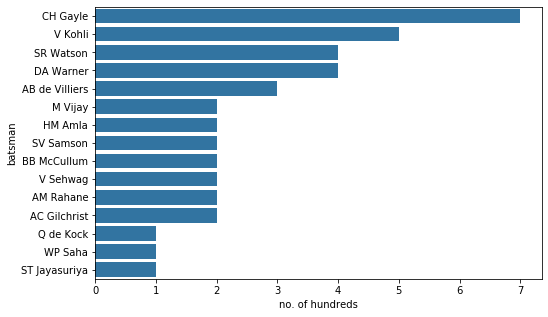

In [14]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=hundreds,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('no. of hundreds');

**Most fours**

In [15]:
fours = deliveries_df[['batsman','batsman_runs']]
fours = fours[fours.batsman_runs == 4]
fours = fours.groupby('batsman').count()
fours =  fours.sort_values('batsman_runs',ascending=False)[:15].reset_index()

In [16]:
fours

,batsman,batsman_runs
0,S Dhawan,524
1,SK Raina,493
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,458
5,RV Uthappa,435
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,372
9,PA Patel,365


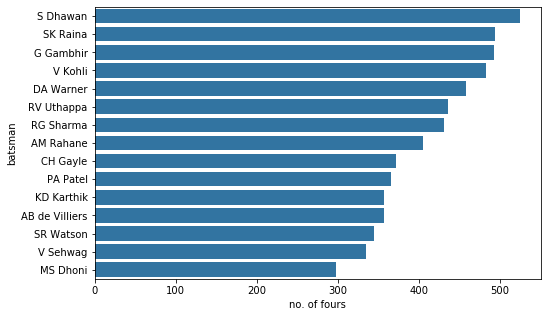

In [17]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=fours,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('no. of fours');

**Most sixes**

In [18]:
sixes = deliveries_df[['batsman','batsman_runs']]
sixes = sixes[sixes.batsman_runs == 6]
sixes = sixes.groupby('batsman').count()
sixes =  sixes.sort_values('batsman_runs',ascending=False)[:15].reset_index()

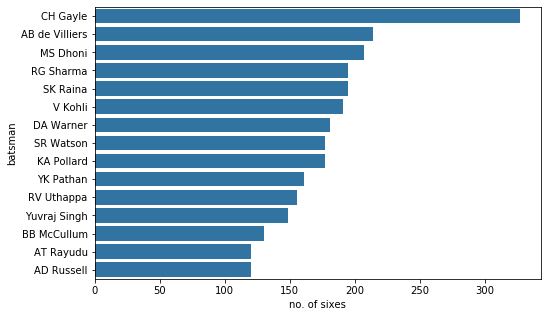

In [19]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=sixes,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('no. of sixes');

**Top 10 wicket takers in IPL**

In [20]:
deliveries_df.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [21]:
other_modes =['run out','retired hurt','hit wicket','obstructing the field']
data2 = deliveries_df[~deliveries_df.dismissal_kind.isin(other_modes)]
data2 = data2[['bowler','dismissal_kind']]
data2 = data2.groupby('bowler').count().sort_values('dismissal_kind',ascending=False).reset_index()[:10]
data2

,bowler,dismissal_kind
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,149
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


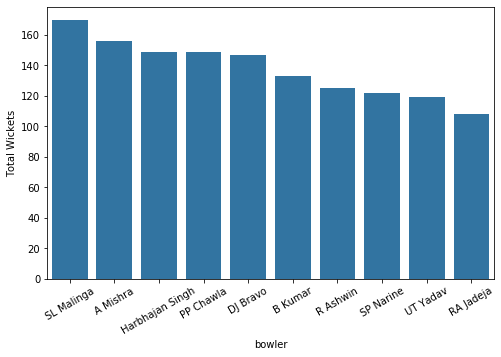

In [22]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=data2,x='bowler',y='dismissal_kind',color=color);
plt.xticks(rotation=30);
plt.ylabel('Total Wickets');

**Top 10 bowlers with best average**

In [23]:
other_modes =['run out','retired hurt','hit wicket','obstructing the field']
wickets = deliveries_df[~deliveries_df.dismissal_kind.isin(other_modes)]
wickets = wickets[['bowler','dismissal_kind']]
wickets = wickets.groupby('bowler').count()

In [24]:
wickets = wickets[wickets.dismissal_kind!=0]
runs = deliveries_df[['bowler','noball_runs','wide_runs','batsman_runs']]
runs['bowler_runs']= runs['noball_runs']+runs['wide_runs']+runs['batsman_runs']
runs = runs[['bowler','bowler_runs']].groupby('bowler').sum()
bowlers_data = pd.merge(runs,wickets,on='bowler')
bowlers_data['average'] = bowlers_data['bowler_runs']/ bowlers_data['dismissal_kind']
bowlers_data = bowlers_data[bowlers_data.bowler_runs > 400]
bowlers_data= bowlers_data.sort_values(by='average')
bowlers_data = bowlers_data[:10]
bowlers_data = bowlers_data.reset_index()
bowlers_data

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bowler,bowler_runs,dismissal_kind,average
0,K Rabada,576,31,18.580645
1,DE Bollinger,693,37,18.729730
2,MF Maharoof,520,27,19.259259
3,S Gopal,746,38,19.631579
4,SL Malinga,3379,170,19.876471
5,MA Starc,693,34,20.382353
6,Imran Tahir,1616,79,20.455696
7,NM Coulter-Nile,719,35,20.542857
8,MR Marsh,414,20,20.700000
9,AJ Tye,849,39,21.769231


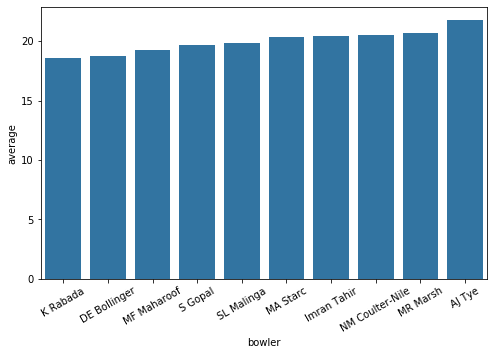

In [25]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=bowlers_data,x='bowler',y='average',color=color);
plt.xticks(rotation=30);


**Top 10 players with max no. of catches**

In [26]:
catches = deliveries_df[['fielder', 'dismissal_kind']]
catches = catches[catches.dismissal_kind == 'caught']
catches = catches.groupby('fielder').count()
catches = catches.sort_values(by='dismissal_kind',ascending=False)[:10].reset_index()

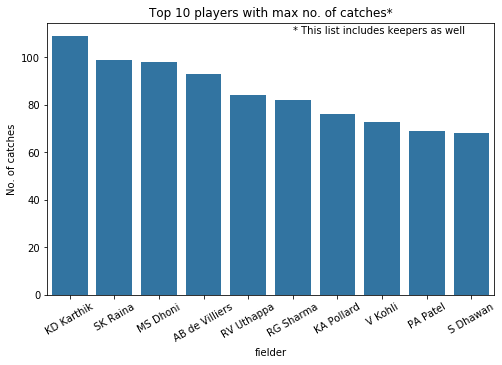

In [27]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=catches,x='fielder',y='dismissal_kind',color=color);
plt.xticks(rotation=30);
plt.text(5,110,'* This list includes keepers as well');
plt.ylabel('No. of catches');
plt.title('Top 10 players with max no. of catches*');

**Top 15 bolwers with most no. of dot balls**

In [28]:
dots = deliveries_df[['bowler','total_runs']]
dots = dots[dots.total_runs == 0]
dots= dots.groupby('bowler').count()
dots = dots.sort_values(by='total_runs',ascending=False)[:15].reset_index()

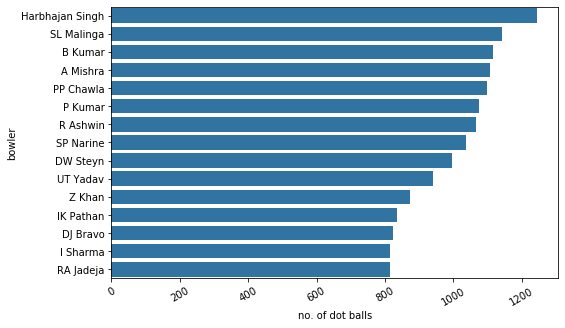

In [29]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=dots,y='bowler',x='total_runs',color=color);
plt.xticks(rotation=30);
plt.xlabel('no. of dot balls');

In [30]:
strikerate = deliveries_df[['bowler','ball']]
strikerate = strikerate[~(strikerate.ball>6)]
strikerate = strikerate.groupby('bowler').count()

In [31]:
other_modes =['run out','retired hurt','hit wicket','obstructing the field']
wickets = deliveries_df[~deliveries_df.dismissal_kind.isin(other_modes)]
wickets = wickets[['bowler','dismissal_kind']]
wickets = wickets.groupby('bowler').count()

In [35]:
wickets = wickets[wickets.dismissal_kind!=0]
runs = deliveries_df[['bowler','noball_runs','wide_runs','batsman_runs']]
runs['bowler_runs']= runs['noball_runs']+runs['wide_runs']+runs['batsman_runs']
runs = runs[['bowler','bowler_runs']].groupby('bowler').sum()
bowlers_data = pd.merge(runs,wickets,on='bowler')
bowlers_data['average'] = bowlers_data['bowler_runs']/ bowlers_data['dismissal_kind']
bowlers_data = bowlers_data[bowlers_data.bowler_runs > 400]
new = pd.merge(bowlers_data,strikerate,on='bowler')
new['s.rate'] = new['ball'] /new['dismissal_kind']
new['overs'] = new['ball'] / 6
new['econ'] = new['bowler_runs'] / new['overs']

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
new[:3]

,bowler_runs,dismissal_kind,average,ball,s.rate,overs,econ
bowler,,,,,,,
A Kumble,1058,45,23.511111,966,21.466667,161.000000,6.571429
A Mishra,3802,156,24.371795,3101,19.878205,516.833333,7.356337
A Mithun,472,7,67.428571,288,41.142857,48.000000,9.833333


In [44]:
strike_rate_15 = new.sort_values('s.rate')[:15].reset_index()
economy_15 = new.sort_values('econ')[:15].reset_index()

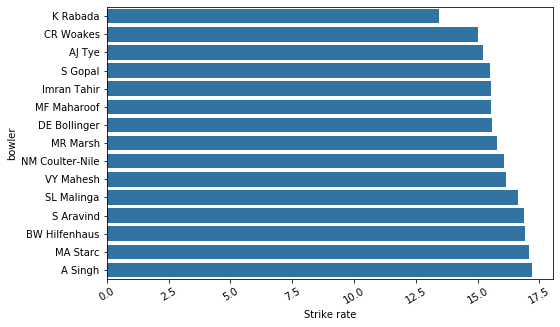

In [45]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=strike_rate_15,y='bowler',x='s.rate',color=color);
plt.xticks(rotation=30);
plt.xlabel('Strike rate');

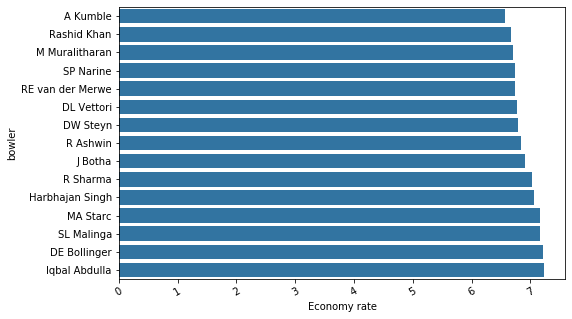

In [46]:
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=economy_15,y='bowler',x='econ',color=color);
plt.xticks(rotation=30);
plt.xlabel('Economy rate');